In [35]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data=pd.read_csv(r'C:\Users\Rahuljoly\anaconda3\pkgs\scikit-learn-0.22.1-py37h6288b17_0\Lib\site-packages\sklearn\datasets\data\boston_house_prices.csv',header=1)

In [37]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [38]:
data.shape

(506, 14)

In [39]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
data.columns[0:13]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [41]:
X_data=pd.DataFrame(data,columns=data.columns[0:13])   #features
Y_data=pd.DataFrame(data,columns=data.columns[13:14]) #target
print(X_data.shape)
print(Y_data.shape)

(506, 13)
(506, 1)


# Visualization 

HeatMap

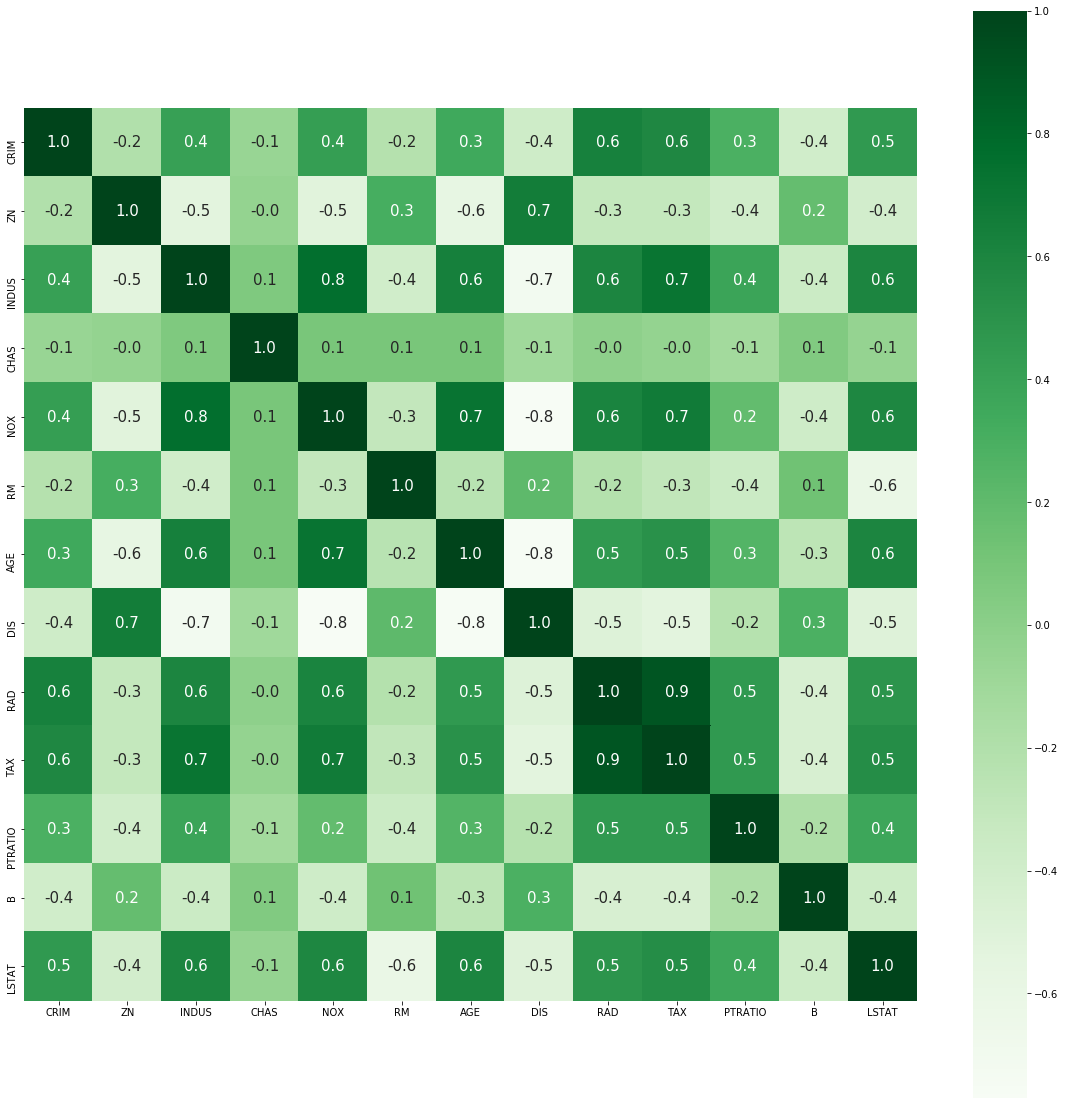

In [65]:
correlation_matrix=X_data.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

Based on the above observations we will take RM and LSTM as features

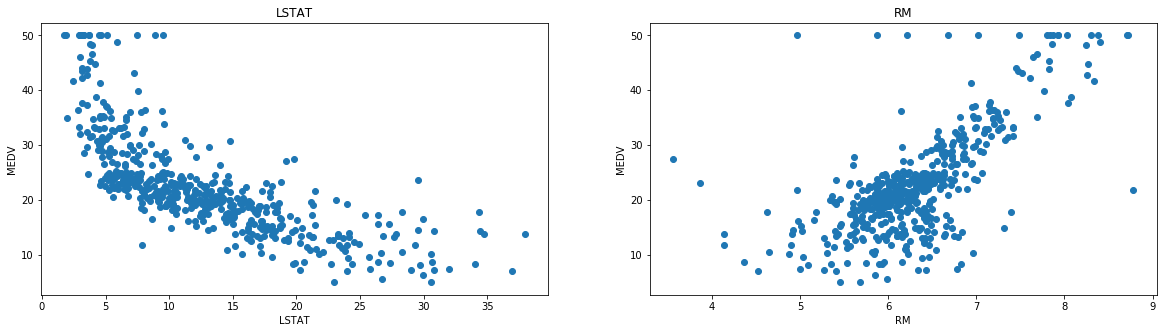

In [43]:

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = Y_data

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = X_data[col]
    y = Y_data
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [44]:
X = pd.DataFrame(np.c_[X_data['LSTAT'], X_data['RM']], columns = ['LSTAT','RM'])
Y = Y_data
print(X.shape)
print(Y.shape)

(506, 2)
(506, 1)


Splitting Dataset into Train and Test

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape) #train dataset
print(X_test.shape)  
print(Y_train.shape) #test dataset
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


# Linear Regression

 training and testing model 

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

model evaluation

In [47]:
# model evaluation for training set
from sklearn.metrics import r2_score
Y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


# Ridge Regression

In [48]:
from sklearn import linear_model
rid_model= linear_model.Ridge(alpha=.5)
rid_model.fit(X_train, Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
# model evaluation for training set
from sklearn.metrics import r2_score
Y_train_predict = rid_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Y_test_predict = rid_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637138128442998
R2 score is 0.6300733608369367


The model performance for testing set
--------------------------------------
RMSE is 5.139898891583886
R2 score is 0.6625717817640641


# Schocastic Gradient Descent

In [50]:
sgd_model=linear_model.SGDRegressor()
sgd_model.fit(X_train, Y_train)

C:\Users\Rahuljoly\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [51]:
# model evaluation for training set
from sklearn.metrics import r2_score
Y_train_predict = sgd_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Y_test_predict = sgd_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.662929267285178
R2 score is 0.6266806268702546


The model performance for testing set
--------------------------------------
RMSE is 5.193516370896892
R2 score is 0.6554952164054026


# SVM

In [52]:
from sklearn import svm
svr_model=svm.SVR()
svr_model.fit(X_train, Y_train)

C:\Users\Rahuljoly\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
# model evaluation for training set
from sklearn.metrics import r2_score
Y_train_predict = svr_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Y_test_predict = svr_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.580642637261776
R2 score is 0.6374510268467587


The model performance for testing set
--------------------------------------
RMSE is 5.240141703429946
R2 score is 0.6492817952869661


# KNeighborsRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knr_model=KNeighborsRegressor()
knr_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [56]:
# model evaluation for training set
from sklearn.metrics import r2_score
Y_train_predict = knr_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Y_test_predict = knr_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.7613424504693755
R2 score is 0.8353036385716982


The model performance for testing set
--------------------------------------
RMSE is 4.445250825539632
R2 score is 0.7476142739020853


# Random forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

C:\Users\Rahuljoly\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
# model evaluation for training set
from sklearn.metrics import r2_score
Y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.8734564894391832
R2 score is 0.959141212371174


The model performance for testing set
--------------------------------------
RMSE is 4.228091146734899
R2 score is 0.7716710766636818
